In [141]:
import pandas as pd

# Cargar datasets
quejas = pd.read_csv('NYPD_Complaint_Data_Historic_20250523.csv', low_memory=False)
arrestos = pd.read_csv('NYPD_Arrest_Data__Year_to_Date__20250523.csv', low_memory=False)
finanzas = pd.read_csv('Neighborhood_Financial_Health_Digital_Mapping_and_Data_Tool_20250525.csv')


In [143]:
arrestos = pd.read_csv('NYPD_Arrest_Data__Year_to_Date__20250523.csv', low_memory=False)

# Ahora revisa de nuevo las columnas
print(arrestos.columns.tolist())


['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC', 'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT', 'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column']


In [145]:
quejas = pd.read_csv('NYPD_Complaint_Data_Historic_20250523.csv', low_memory=False)

# Ahora revisa de nuevo las columnas
print(quejas.columns.tolist())


['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE', 'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX']


In [147]:
finanzas= pd.read_csv('Neighborhood_Financial_Health_Digital_Mapping_and_Data_Tool_20250525.csv', low_memory=False)

# Ahora revisa de nuevo las columnas
print(finanzas.columns.tolist())


['Year Published', 'PUMA', 'Borough', 'Neighborhoods', 'CD', 'Join', 'NYC_Poverty_Rate', 'Median_Income', 'Perc_White', 'Perc_Black', 'Perc_Asian', 'Perc_Other', 'Perc_Hispanic', 'Goal', 'GoalName', 'GoalFullName', 'TotalOutcome', 'GoalRank', 'IndexScore', 'ScoreRank', 'Ind1', 'Ind1Outcome', 'Ind1Rank', 'Ind1Definition', 'Ind2', 'Ind2Outcome', 'Ind2Rank', 'Ind2Definition', 'Ind3', 'Ind3Outcome', 'Ind3Rank', 'Ind3Definition', 'Ind4', 'Ind4Outcome', 'Ind4Rank', 'Ind4Definition', 'Ind5', 'Ind5Outcome', 'Ind5Rank', 'Ind5Definition', 'Ind6', 'Ind6Outcome', 'Ind6Rank', 'Ind6Definition', 'Ind7', 'Ind7Outcome', 'Ind7Rank', 'Ind7Definition', 'Ind8', 'Ind8Outcome', 'Ind8Rank', 'Ind8Definition']


In [149]:
quejas = quejas[[
    'CMPLNT_NUM',      # ID único de queja
    'CMPLNT_FR_DT',    # Fecha de ocurrencia
    'LAW_CAT_CD',      # Tipo de delito (felony, misdemeanor, violation)
    'OFNS_DESC',       # Descripción del delito
    'BORO_NM'          # Nombre del barrio (Bronx, Brooklyn, etc.)
]].copy()

# Convertimos fechas a tipo datetime
quejas['CMPLNT_FR_DT'] = pd.to_datetime(quejas['CMPLNT_FR_DT'], errors='coerce')

display(quejas)


,CMPLNT_NUM,CMPLNT_FR_DT,LAW_CAT_CD,OFNS_DESC,BORO_NM
0,39468181,2008-02-20,FELONY,BURGLARY,BROOKLYN
1,50539499,2008-08-21,FELONY,GRAND LARCENY,MANHATTAN
2,45223390,2008-04-03,FELONY,FELONY ASSAULT,BROOKLYN
3,50594658,2008-08-19,MISDEMEANOR,PETIT LARCENY,MANHATTAN
4,44451016,2008-03-10,FELONY,ROBBERY,BROOKLYN
...,...,...,...,...,...
9491941,290072996,2024-07-14,MISDEMEANOR,SEX CRIMES,QUEENS
9491942,290788624,2024-07-28,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,QUEENS
9491943,282607339,2024-02-19,VIOLATION,HARRASSMENT 2,QUEENS
9491944,287032013,2024-05-16,FELONY,MISCELLANEOUS PENAL LAW,QUEENS


In [150]:
arrestos = arrestos[[
    'ARREST_KEY',      # ID único de arresto
    'ARREST_DATE',     # Fecha del arresto
    'LAW_CAT_CD',      # Tipo de delito
    'OFNS_DESC',       # Descripción del delito
    'ARREST_BORO',     # Barrio del arresto
    'AGE_GROUP',       # Grupo de edad del perpetrador
    'PERP_SEX',        # Sexo del perpetrador
    'PERP_RACE'        # Raza del perpetrador
]].copy()

# Convertimos fechas a tipo datetime
arrestos['ARREST_DATE'] = pd.to_datetime(arrestos['ARREST_DATE'], errors='coerce')

display(arrestos)

,ARREST_KEY,ARREST_DATE,LAW_CAT_CD,OFNS_DESC,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE
0,298874520,2025-01-04,F,GRAND LARCENY,M,25-44,M,BLACK
1,298799078,2025-01-02,M,ASSAULT 3 & RELATED OFFENSES,M,25-44,F,BLACK
2,298921520,2025-01-05,F,MISCELLANEOUS PENAL LAW,K,45-64,M,WHITE
3,299008265,2025-01-07,F,FELONY ASSAULT,Q,45-64,M,BLACK
4,298969999,2025-01-06,F,DANGEROUS WEAPONS,M,25-44,M,WHITE
...,...,...,...,...,...,...,...,...
71237,303938395,2025-03-31,F,FORGERY,M,18-24,M,BLACK HISPANIC
71238,303885891,2025-03-30,M,OTHER OFFENSES RELATED TO THEFT,B,18-24,F,BLACK
71239,303937884,2025-03-31,F,GRAND LARCENY,M,25-44,M,WHITE HISPANIC
71240,303887215,2025-03-30,M,OTHER OFFENSES RELATED TO THEFT,B,25-44,M,BLACK


In [153]:

# Cargar el archivo CSV (ajusta el nombre si es diferente)
finanzas = pd.read_csv('Neighborhood_Financial_Health_Digital_Mapping_and_Data_Tool_20250525.csv', low_memory=False)

# Seleccionar las columnas de mayor relevancia social y económica
columnas_interes = [
    'Borough',
    'Neighborhoods',
    'PUMA',
    'NYC_Poverty_Rate',
    'Median_Income',
    'Perc_White',
    'Perc_Black',
    'Perc_Asian',
    'Perc_Hispanic',
    'Perc_Other',
    'IndexScore',
    'Goal',
    'TotalOutcome'
]

finanzas_reducido = finanzas[columnas_interes].copy()

# Mostrar todas las columnas
import pandas as pd
pd.set_option('display.max_columns', None)

# Mostrar las primeras 10 filas
display(finanzas_reducido.head(10))



,Borough,Neighborhoods,PUMA,NYC_Poverty_Rate,Median_Income,Perc_White,Perc_Black,Perc_Asian,Perc_Hispanic,Perc_Other,IndexScore,Goal,TotalOutcome
0,Bronx,"Riverdale, Fieldston & Kingsbridge",3701,0.152,30437,0.324,0.124,0.052,0.477,0.023,5.184720,Build Assets,-0.466778
1,Bronx,"Riverdale, Fieldston & Kingsbridge",3701,0.152,30437,0.324,0.124,0.052,0.477,0.023,1.919036,Financial Services,-3.560422
2,Bronx,"Riverdale, Fieldston & Kingsbridge",3701,0.152,30437,0.324,0.124,0.052,0.477,0.023,7.491316,Financial Shocks,7.911697
3,Bronx,"Riverdale, Fieldston & Kingsbridge",3701,0.152,30437,0.324,0.124,0.052,0.477,0.023,4.585011,Goods & Services,0.334718
4,Bronx,"Riverdale, Fieldston & Kingsbridge",3701,0.152,30437,0.324,0.124,0.052,0.477,0.023,3.970856,Jobs & Income,1.784644
5,Bronx,"Riverdale, Fieldston & Kingsbridge",3701,0.152,30437,0.324,0.124,0.052,0.477,0.023,3.960090,Overall Index,6.003858
6,Bronx,"Riverdale, Fieldston & Kingsbridge",3701,0.152,30437,0.324,0.124,0.052,0.477,0.023,NaN,Majority Race/Ethnicity,NaN
7,Bronx,"Wakefield, Williamsbridge & Woodlawn",3702,0.232,26136,0.069,0.655,0.026,0.226,0.023,4.637373,Build Assets,-2.147704
8,Bronx,"Bedford Park, Fordham North & Norwood",3706,0.264,18674,0.066,0.154,0.061,0.696,0.022,0.985036,Overall Index,-33.379155
9,Bronx,"Wakefield, Williamsbridge & Woodlawn",3702,0.232,26136,0.069,0.655,0.026,0.226,0.023,1.706672,Financial Services,-4.208330


In [159]:
#Agrupaciones por distrito

In [161]:
quejas_por_borough = quejas.groupby('BORO_NM').size().reset_index(name='Total_Quejas')

In [163]:
# Mapeamos siglas a nombres completos
mapa_boroughs = {'B': 'BRONX', 'K': 'BROOKLYN', 'M': 'MANHATTAN', 'Q': 'QUEENS', 'S': 'STATEN ISLAND'}
arrestos['BORO_NM'] = arrestos['ARREST_BORO'].map(mapa_boroughs)

# Agrupamos arrestos por borough
arrestos_por_borough = arrestos.groupby('BORO_NM').size().reset_index(name='Total_Arrestos')


In [165]:
finanzas_por_borough = finanzas_reducido.groupby('Borough')[
    ['NYC_Poverty_Rate', 'Median_Income', 'IndexScore']
].mean().reset_index()


In [171]:
# Limpiar espacios y pasar a mayúsculas para evitar errores de texto
df['BORO_NM'] = df['BORO_NM'].str.strip().str.upper()
finanzas_por_borough['Borough'] = finanzas_por_borough['Borough'].str.strip().str.upper()

In [173]:
df = quejas_por_borough.merge(arrestos_por_borough, on='BORO_NM')
df = df.merge(finanzas_por_borough, left_on='BORO_NM', right_on='Borough')
df.drop(columns='Borough', inplace=True)

display(df)

,BORO_NM,Total_Quejas,Total_Arrestos,NYC_Poverty_Rate,Median_Income,IndexScore
0,BRONX,2054181,15837,0.252500,21453.900000,2.440128
1,BROOKLYN,2777780,20064,0.215167,28471.444444,3.773419
2,MANHATTAN,2288112,17133,0.151500,47216.400000,5.662254
3,QUEENS,1928873,15193,0.199357,29391.571429,4.177307
4,STATEN ISLAND,434281,3015,0.156667,35799.000000,5.468874


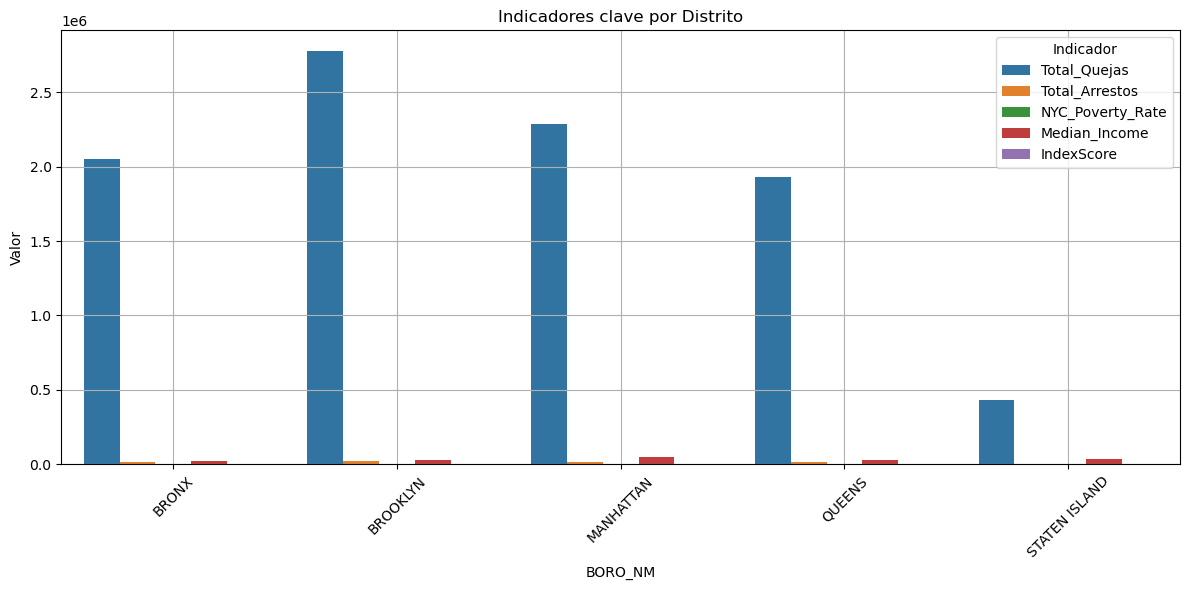

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertimos a formato "largo" para graficar fácilmente
df_melt = df.melt(id_vars='BORO_NM',
                  value_vars=['Total_Quejas', 'Total_Arrestos', 'NYC_Poverty_Rate', 'Median_Income', 'IndexScore'],
                  var_name='Indicador',
                  value_name='Valor')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melt, x='BORO_NM', y='Valor', hue='Indicador')
plt.title('Indicadores clave por Distrito')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()